In [1]:
require('cowplot')
library('ggplot2')
theme_set(theme_gray()) # switch to default ggplot2 theme for good
theme_update(panel.background = element_rect(fill = "grey95"))

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
realdata <- read.csv(file.path('..', 'zmeta_rocs', 'results', 'realdata_TPR.csv'), header=T, sep=",")

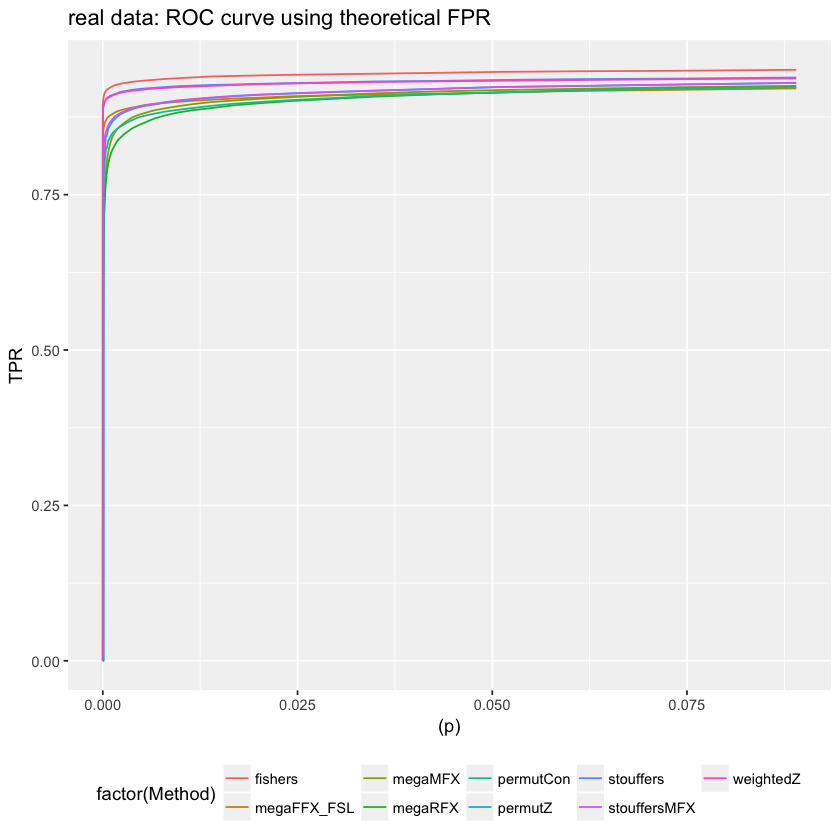

In [3]:
p <- ggplot(data=subset(realdata, p<0.1),aes(x=(p), y=TPR, group=Method, colour=factor(Method))) + 
geom_line() + ggtitle('real data: ROC curve using theoretical FPR') + theme(legend.position = 'bottom')

print(p)

In [4]:
simufpr <- read.csv(file.path('data', 'allsimudat_test1_k025_n20_nominal.csv'))

# Only looking at nominal data under some heterogeneity
simufpr <- subset(simufpr, Between==1 & unitMism=='nominal')

In [5]:
head(simufpr)

methods,glm,nStudies,nSubjects,Between,Within,nSubjectsSame,withinVariation,unitMism,soft2,⋯,rankP,expectedP,lnp,equivz,allgroups,expectedz,p_upper,z_upper,p_lower,z_lower
fishers,1,25,20,1,20,1,16,nominal,0,⋯,1,9.746589e-07,-49.52660,9.626282,1 20 25 20 1026000 16 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
fishers,1,25,20,1,20,1,16,nominal,0,⋯,2,1.949318e-06,-48.10786,9.479343,1 20 25 20 1026000 16 0 1 nominal,4.616714,2.360715e-07,5.037301,5.430440e-06,4.399284
fishers,1,25,20,1,20,1,16,nominal,0,⋯,3,2.923977e-06,-46.15251,9.273095,1 20 25 20 1026000 16 0 1 nominal,4.531813,6.029947e-07,4.854651,7.041588e-06,4.342560
fishers,1,25,20,1,20,1,16,nominal,0,⋯,4,3.898635e-06,-45.07518,9.157519,1 20 25 20 1026000 16 0 1 nominal,4.470676,1.062248e-06,4.741206,8.545076e-06,4.299866
fishers,1,25,20,1,20,1,16,nominal,0,⋯,5,4.873294e-06,-43.65503,9.002951,1 20 25 20 1026000 16 0 1 nominal,4.422720,1.582347e-06,4.659831,9.982025e-06,4.265292
fishers,1,25,20,1,20,1,16,nominal,0,⋯,6,5.847953e-06,-43.44453,8.979819,1 20 25 20 1026000 16 0 1 nominal,4.383181,2.146099e-06,4.596707,1.137261e-05,4.236084


In [6]:
# simufpr$settings <- paste(simufpr$Between, simufpr$Within/simufpr$nSubjects, simufpr$withinVariation, sep='-')

# # Interpolation function from theoretical TPR to observed TPR
# interp_to_observed<-by(simufpr, simufpr$settings, function(df) {approxfun(x=df$P, y=df$expectedP)})

# # interp_to_observed$`0-0.25-1`
# print(attributes(interp_to_observed)$names[1])
# oo<-attr(interp_to_observed, attributes(interp_to_observed)$names[1])
# print(oo)
# print(class(interp_to_observed))
# # paste(simufpr["Within"], simufpr["Between"], simufpr["withinVariation"])

# interp_to_observed

In [7]:
# approx_TPR <- function(y, simudf, Between, Within, withinVariation, methods) {
#     sub_df = subset(simudf, Between==Between & Within==Within & withinVariation==withinVariation & methods==methods)
#     approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=y)
#     plot(sub_df$P, sub_df$expectedP, main = "approx")
#     points(approximated, col = 2, pch = "*")
#     return(approximated$y)
# }

In [8]:
realdata_withsimuFPR = data.frame()

for (variation in unique(simufpr$withinVariation)){
#     print(variation)
    currdat <- realdata
    currdat$withinVariation <- variation
    currdat$Between <- 1
    currdat$Within <- 20
    currdat$FPR <- NA

    methods <- levels(realdata$Method)
    length(methods)
    
    for (meth in methods){
        print(paste('Currently: ', meth))
        th_p = currdat[currdat$Method==meth,]$p
       
        sub_df = subset(simufpr, Between==1 & Within==20 & withinVariation==variation & methods == meth)
        
        approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=th_p)
#         plot(sub_df$P, sub_df$expectedP, main = "approx")
#         points(approximated, col = 2, pch = "*")
         currdat[currdat$Method==meth,]$FPR <- approximated$y

    }
    
    currdat[currdat$p==0,]$FPR <- 0
    print(currdat[currdat$p==0,]$FPR) 

    realdata_withsimuFPR <- rbind(realdata_withsimuFPR, currdat)
}

for (within in unique(simufpr$Within)){
    currdat <- realdata
    currdat$withinVariation <- 1
    currdat$Between <- 1
    currdat$Within <- within
    currdat$FPR <- NA

    methods <- levels(realdata$Method)
    length(methods)
    
    for (meth in methods){
        print(paste('Currently: ', meth))
        th_p = currdat[currdat$Method==meth,]$p
       
        sub_df = subset(simufpr, Between==1 & Within==within & withinVariation==1 & methods == meth)
        
        approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=th_p)
#         plot(sub_df$P, sub_df$expectedP, main = "approx")
#         points(approximated, col = 2, pch = "*")
         currdat[currdat$Method==meth,]$FPR <- approximated$y

    }
    
    currdat[currdat$p==0,]$FPR <- 0
    print(currdat[currdat$p==0,]$FPR) 

    realdata_withsimuFPR <- rbind(realdata_withsimuFPR, currdat)
}

# simufpr_homo <- subset(simufpr, withinVariation==1 & Between==1 & Within==20)

# simufpr_out16 <- subset(simufpr, withinVariation==16 & Between==1) 
# names(simufpr_out16)

# print(levels(simufpr_out16$methods))
# print('--')
# print(levels(realdata$Method))



[1] "Currently:  fishers"
[1] "Currently:  megaFFX_FSL"
[1] "Currently:  megaMFX"
[1] "Currently:  megaRFX"
[1] "Currently:  permutCon"
[1] "Currently:  permutZ"
[1] "Currently:  stouffers"
[1] "Currently:  stouffersMFX"
[1] "Currently:  weightedZ"
[1] 0 0 0 0 0 0 0 0 0
[1] "Currently:  fishers"
[1] "Currently:  megaFFX_FSL"
[1] "Currently:  megaMFX"
[1] "Currently:  megaRFX"
[1] "Currently:  permutCon"
[1] "Currently:  permutZ"
[1] "Currently:  stouffers"
[1] "Currently:  stouffersMFX"
[1] "Currently:  weightedZ"
[1] 0 0 0 0 0 0 0 0 0
[1] "Currently:  fishers"
[1] "Currently:  megaFFX_FSL"
[1] "Currently:  megaMFX"
[1] "Currently:  megaRFX"
[1] "Currently:  permutCon"
[1] "Currently:  permutZ"
[1] "Currently:  stouffers"
[1] "Currently:  stouffersMFX"
[1] "Currently:  weightedZ"
[1] 0 0 0 0 0 0 0 0 0
[1] "Currently:  fishers"
[1] "Currently:  megaFFX_FSL"
[1] "Currently:  megaMFX"
[1] "Currently:  megaRFX"
[1] "Currently:  permutCon"
[1] "Currently:  permutZ"
[1] "Currently:  stouffer

In [9]:
unique(simufpr$Within)

[1] 20 80 40 10  5

In [10]:
# num_dig = 2

# aa <- subset(realdata, methods==methods[i])$p
# aa<- (round(-log10(aa[aa>0]), digits=num_dig))
# # print(aa)

# print(unique(subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$allgroups))

# bb <- subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$P
# bb<- round(-log10(bb), digits=num_dig)
# cc <- subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$expectedP

# print(length(bb))
# print('---')
# print(length(cc))
# # sum(is.na(match(aa,bb)))
# # length(aa)

# x <- bb
# y <- cc

# print(head(y))

# par(mfrow = c(2,1))
# plot(x, y, main = "approx(.) and approxfun(.)")
# points(approx(x, y, xout=aa), col = 2, pch = "*")
# # points(approx(x, y, method = "constant"), col = 4, pch = "*")

# # f <- approxfun(x, y)
# # curve(f(x), 0, 11, col = "green2")
# # points(x, y)
# # is.function(fc <- approxfun(x, y, method = "const")) # TRUE
# # curve(fc(x), 0, 10, col = "darkblue", add = TRUE)
# # ## different extrapolation on left and right side :
# # plot(approxfun(x, y, rule = 2:1), 0, 11,
# #      col = "tomato", add = TRUE, lty = 3, lwd = 2)

In [11]:
head(subset(realdata_withsimuFPR, Method=='permutCon'))

,Method,p,TPR,withinVariation,Between,Within,FPR
708,permutCon,0.000000e+00,0,16,1,20,0
709,permutCon,1.000000e-08,0,16,1,20,NA
710,permutCon,1.204504e-08,0,16,1,20,NA
711,permutCon,1.450829e-08,0,16,1,20,NA
712,permutCon,1.747528e-08,0,16,1,20,NA
713,permutCon,2.104904e-08,0,16,1,20,NA


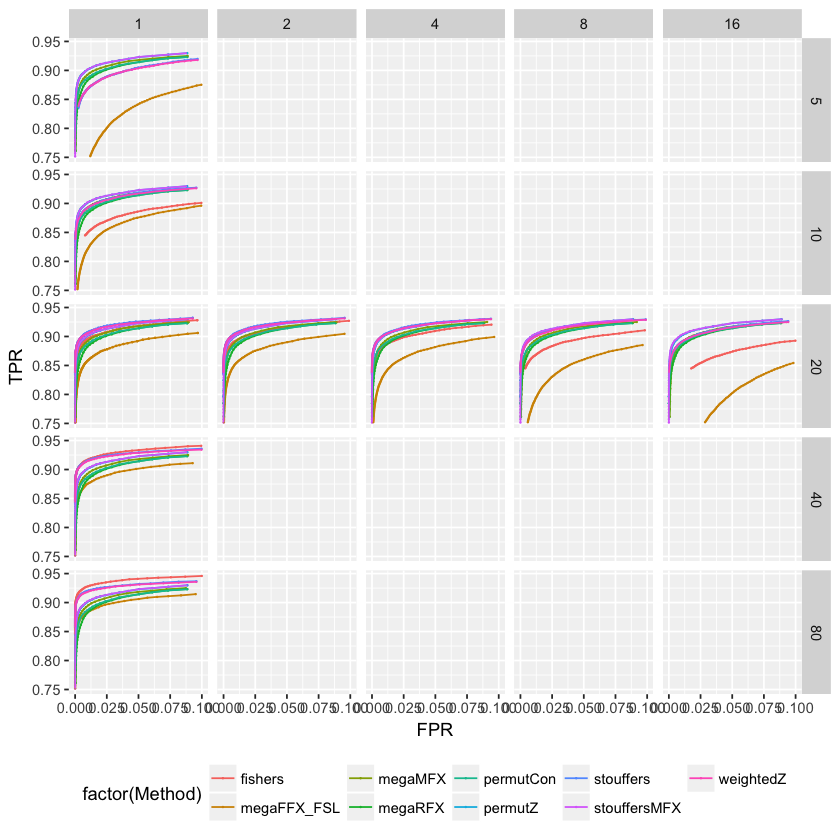

In [12]:
# print(p)

p <- ggplot(data=subset(realdata_withsimuFPR, FPR<=0.10 & TPR>0.75),
            aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + geom_point(size=0.02) + geom_line() + 
             facet_grid(Within ~ withinVariation) + theme(legend.position="bottom")

print(p)

In [65]:
realdata_withsimuFPR$heterogeneity <- realdata_withsimuFPR$Between/realdata_withsimuFPR$Within*20

Warning message:
“Removed 152 rows containing missing values (geom_path).”Warning message:
“Removed 151 rows containing missing values (geom_path).”

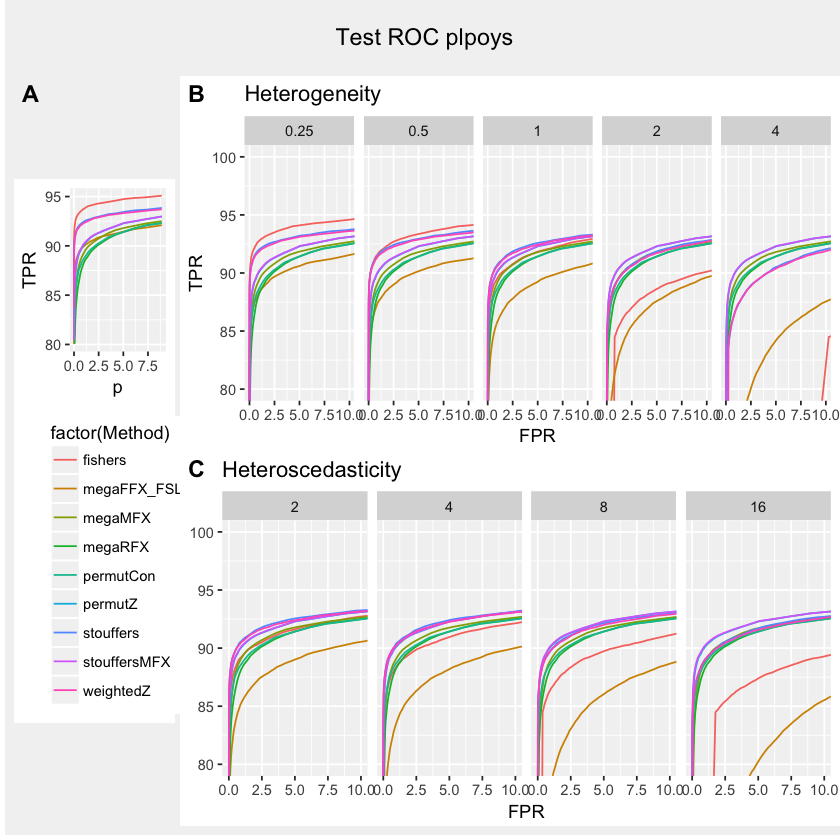

In [66]:
roc_plot <- function(data, aes_line) {
# print(names(data))
# print(("p" %in% names(data)))
    if ("p" %in% names(data)){
        data$p <- data$p*100
    } 

#     print("FPR" %in% names(data))
    
    if ("FPR" %in% names(data)){
        data$FPR <- data$FPR*100
    } 
    
    data$TPR <- data$TPR*100
    
    p <- ggplot(data=data,aes(group=Method, colour=factor(Method))) + 
    geom_line(aes_line) + coord_cartesian(xlim = c(0, 10), ylim = c(80, 100)) 
    return(p)
}
    

roc_plots <- function(data){
              
    # Panel A: Against theoretical FPR
    p1 <- roc_plot(subset(realdata, p<0.1 & TPR>0.8), aes(x=p, y=TPR)) + 
            theme(legend.position="bottom", legend.direction='vertical') + coord_fixed(ratio = 1)
    
    # Panel B: Against simulated FPR & under varying levels of heterogenerity
    p2 <- roc_plot(subset(realdata_withsimuFPR, withinVariation==1), aes(x=FPR, y=TPR)) + 
            facet_grid(.~heterogeneity) + ggtitle('Heterogeneity') + theme(legend.position="none") 
#     p2 <- ggplot(data=subset(realdata_withsimuFPR, FPR<=0.10 & TPR>0.75 & withinVariation==1),
#             aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + geom_point(size=0.02) + geom_line() + 
            

    # Panel C: Against simulated FPR & under heteroscedasticity
    p3 <- roc_plot(subset(realdata_withsimuFPR, withinVariation>1), aes(x=FPR, y=TPR)) + 
                facet_grid(.~withinVariation) + ggtitle('Heteroscedasticity') + theme(legend.position="bottom") + theme(legend.position="none")  + theme(legend.position="none") + ylab(NULL)
#     ggplot(data=subset(realdata_withsimuFPR, FPR<=0.10 & TPR>0.75 & withinVariation>1),
#             aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + 
#     geom_point(size=0.02) + geom_line() + 

    
    # Organise the figure: title, panel A at the top, panel B and C in a second row
    right_column <- plot_grid(p1, labels = 'A', ncol=1)
   
    
    left_column <- plot_grid(p2, p3, labels = c('B', 'C'), ncol=1)
    
    p <- plot_grid(right_column, left_column, labels = ' ', ncol=2, rel_widths=c(1, 4))
    title <- ggdraw() + draw_label(
        'Test ROC plpoys')
    p <- plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1)) + 
        theme(plot.title=element_text(size=12), text=element_text(size=10))

    return(p)
}

p <- roc_plots(realdata)

# print on screen
print(p)